# Let's do a Bechdel test graphic
*April 11, 2022*

Courtesy of the Datawrapper's github page, I came across [an API that serves Bechdel test data](https://bechdeltest.com/). Let's check it out. First, we'll import Pandas.

In [21]:
import pandas as pd

Then we read in the data and take a peek. We're just grabbing all the data they offer, but there are other endpoints that can be used for other purposes too.

In [22]:
raw = pd.read_json("https://bechdeltest.com/api/v1/getAllMovies")

raw.head()

,rating,title,id,imdbid,year
0,0,Passage de Venus,9602,3155794,1874
1,0,La Rosace Magique,9804,14495706,1877
2,0,Sallie Gardner at a Gallop,9603,2221420,1878
3,0,Le singe musicien,9806,12592084,1878
4,0,Athlete Swinging a Pick,9816,7816420,1881


Now, let's pivot to show the counts of scores for every year on record.

In [23]:
by_year = raw.pivot_table(index="year", columns="rating",values="title", aggfunc="count").fillna(0)

Now we'll calculate the % that passed (had a rating of 3), and we'll do another column that smooths it out so the graph looks nicer. We can visualize both in Datawrapper after.

In [24]:
by_year["%_pass"] = (by_year[3] / by_year.sum(axis=1) * 100).round(2)
by_year["%_pass_smooth"] = by_year["%_pass"].rolling(7).mean()

Now we filter, and we'll remove years before 1950 because it's a lot of data to visualize, and because a lot of the earlier years don't look that robust.

In [25]:
by_year = by_year.loc[1950:2021, ["%_pass", "%_pass_smooth"]]

Let's graph it here before [bringing it over to Datawrapper](https://www.datawrapper.de/_/UUN55/).

<AxesSubplot:xlabel='year'>

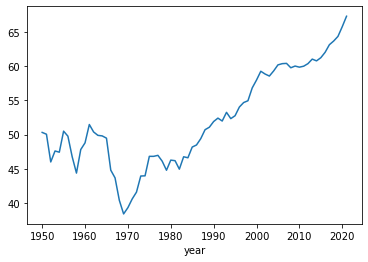

In [28]:
by_year["%_pass_smooth"].plot()

\-30\-